# Classement des universités

In [12]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# librairie word cloud
from wordcloud import WordCloud

# librairie matplotlib
import matplotlib.pyplot as plt

# Permet d'afficher les données disponibles dans le répertoire data
import os
print(os.listdir(".")) 

['.ipynb_checkpoints', 'functions.py', 'callbacks.py', 'app.py', 'index.py', 'apps', 'timesData.csv', '__pycache__', 'assets', 'Top Universities.ipynb']


### Faire une analyse du jeu de données correspondant au classement des 50 meilleures universités en 2016.

In [13]:
# Chargement des données qui seront utilisées.
timesData = pd.read_csv("timesData.csv")

In [14]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [15]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,06",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


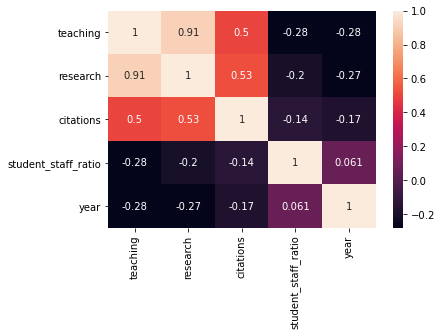

In [16]:
import seaborn as sn
corrMatrix = timesData.corr ()
#print(corrMatrix)
sn.heatmap (corrMatrix, annot = True)
plt.show ()

Text(0, 0.5, 'Score moyen du revenu')

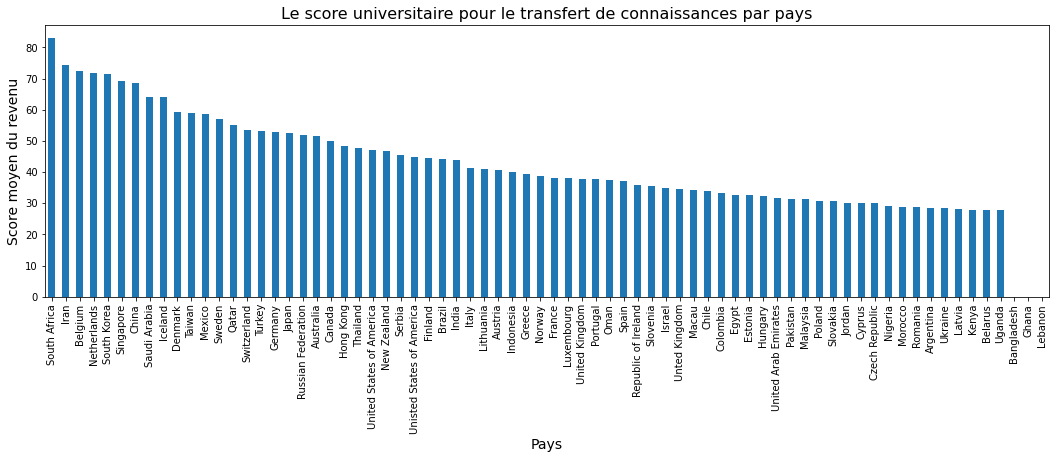

In [17]:
#2. Existe-t-il une corrélation entre le score universitaire pour le transfert de connaissances et le score universitaire des perspectives internationales (personnel, étudiants, recherche) ? 
#Utiliser un ou plusieurs graphique pour justifier votre réponse.
dfValue = timesData
dfValue.income = pd.to_numeric(dfValue.income, errors='coerce')

gkk = dfValue.groupby(['country', 'income']).mean() 

ax = dfValue.groupby(['country']).income.mean().sort_values(ascending=False).plot(kind='bar', figsize = (18,5))
ax.set_xlabel('Pays', fontsize=14)
ax.set_title("Le score universitaire pour le transfert de connaissances par pays",fontsize=16)
ax.set_ylabel("Score moyen du revenu", fontsize=14)

In [18]:
import numpy as np

grouped = dfValue.groupby('country')
y=grouped['income'].agg(np.mean).sort_values(ascending=False)
trace = go.Bar(
                x = y.index.get_level_values(0).tolist(),
                y = y,
                name = "Le score universitaire pour le transfert de connaissances par pays",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = y.index.get_level_values(0).tolist())

layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

### Veille PCA

In [19]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
# choix du nombre de composantes à calculer
n_comp = 8

# import de l'échantillon
data = pd.read_csv("timesData.csv")

data = data[data.year==2016].iloc[:50,:]
# selection des colonnes à prendre en compte dans l'ACP
#data_pca = data[["world_rank","university_name","country","teaching","international","research","citations","income","total_score","num_students","student_staff_ratio","international_students","female_male_ratio","year"]]

data.income = pd.to_numeric(dfValue.income, errors='coerce')
data.num_students  = [str(each).replace(',', '') for each in data.num_students]
data.num_students =  pd.to_numeric(data.num_students, errors='coerce')

data.international =  pd.to_numeric(data.international, errors='coerce')

data.total_score =  pd.to_numeric(data.total_score, errors='coerce')
#data.university_name =  pd.to_numeric(data.university_name, errors='coerce')
#data.country =  pd.to_numeric(data.country, errors='coerce')
#data.world_rank =  pd.to_numeric(data.world_rank, errors='coerce')
X=data.values

data.head()
#print(X)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33%,37 : 63,2016


In [20]:
data_pca = data[["teaching","international","research","citations","income","total_score","num_students","student_staff_ratio"]]

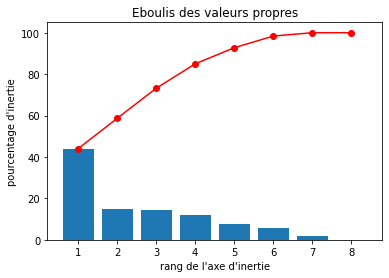

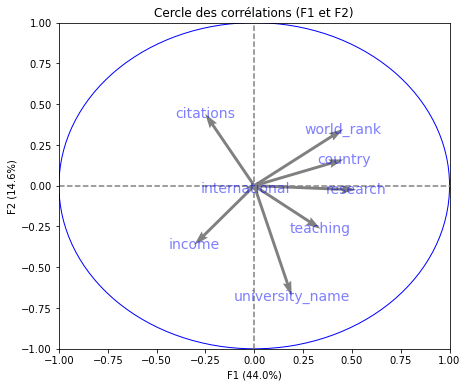

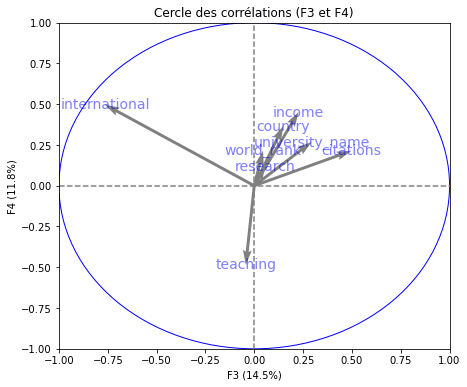

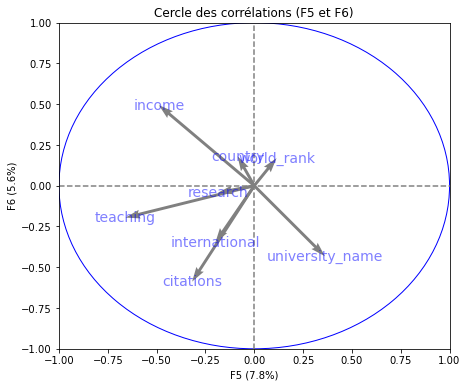

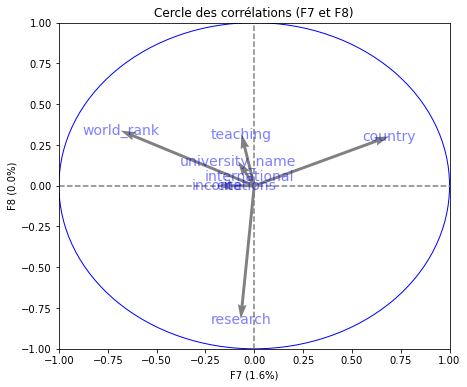

In [21]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["university_name"] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
#Le cercle des corrélations est la projection du nuage des variables sur le plan des composantes principales.
#Les variables bien représentées sont celles qui sont proches du cercle, celles qui sont proches de l’origine sont mal représentées.
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(features))

# Projection des individus
#X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(names))

plt.show()

In [22]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[4.39979540e-01 1.46474425e-01 1.45224157e-01 1.17950601e-01
 7.78606876e-02 5.62192904e-02 1.62717746e-02 1.95251876e-05]
[13.26619071  7.65439546  7.62165748  6.86878739  5.5807056   4.74212148
  2.55121732  0.08837463]


In [43]:
loadings = pd.DataFrame(pca.components_, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'], index=list(data_pca.columns))
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
teaching,0.455655,0.191761,0.457353,0.339224,-0.044850,0.521874,-0.251287,-0.306354
international,0.347418,-0.675919,0.160784,-0.264372,-0.015775,-0.025474,0.441242,-0.362076
research,0.044999,0.294249,0.149059,-0.043320,-0.764770,0.057339,0.497489,0.227247
citations,0.214829,0.268676,0.365807,-0.485505,0.497416,0.119981,0.214033,0.452222
income,0.114081,0.361798,-0.085295,-0.659171,-0.199442,-0.186386,-0.318155,-0.488432
total_score,0.169020,-0.432310,0.180694,-0.195773,-0.349095,-0.043036,-0.588097,0.493949
num_students,-0.683979,-0.083771,0.690947,-0.065551,-0.023325,-0.069146,-0.042112,-0.190660
student_staff_ratio,0.337777,0.150946,0.302672,0.316721,0.057061,-0.817277,-0.000800,-0.000494
